## Analysis of IMDB Movie Data

### Content

1. [Introduction](#Introduction:)
2. [Import libraries](#Import-libraries)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Exploratory data analysis](#Exploratory-data-analysis)

### Introduction


In this Jupyter Notebook, we will analyze the IMDB Movie Data, which provides information about various movies such as their ratings, genres, and box office performance. The dataset contains a wealth of information that we can explore and gain insights from.

We will utilize the powerful combination of NumPy, Pandas, Seaborn, and Matplotlib libraries to load, clean, and visualize the data. By applying data analysis techniques and creating visualizations, we aim to uncover interesting patterns, trends, and relationships within the movie dataset.

Let's dive into the analysis and discover fascinating aspects of the IMDB Movie Data!

### Import libraries

In [35]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
data = pd.read_csv('IMDB-Movie-Data.csv', index_col=0)
data.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               1000 non-null   object 
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 93.8+ KB


In [38]:
data.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [39]:
data.describe(include='object')

,Title,Genre,Description,Director,Actors
count,1000,1000,1000,1000,1000
unique,999,207,1000,644,996
top,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw..."
freq,2,50,1,8,2


### Data Preprocessing

#### Checking null values

In [40]:
missed_collumns = data.isna().sum()
print(missed_collumns[missed_collumns > 0])
print('-----------------------------------')
print((missed_collumns[missed_collumns > 0]  / 1000) * 100)

Revenue (Millions)    128
Metascore              64
dtype: int64
-----------------------------------
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64


In [41]:
data.fillna(data.mean(numeric_only=True), inplace=True)

In [46]:
data.describe()

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,3.205962,18.810908,0.945429,1.887626e+05,96.412043,16.634858
min,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,2010.000000,100.000000,6.200000,3.630900e+04,17.442500,47.750000
50%,2014.000000,111.000000,6.800000,1.107990e+05,60.375000,58.985043
75%,2016.000000,123.000000,7.400000,2.399098e+05,99.177500,71.000000
max,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


#### Checking duplicate values

In [47]:
data.duplicated().sum()

0

In [48]:
data.columns

Index(['Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [146]:
num_col_bool = [data[col].dtype != 'object' for col in data.columns]
num_col = data.columns[num_col_bool]
num_col

Index(['Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [147]:
cat_col_bool = [data[col].dtype == 'object' for col in data.columns]
cat_col = data.columns[cat_col_bool]
cat_col

Index(['Title', 'Genre', 'Description', 'Director', 'Actors'], dtype='object')

### Exploratory data analysis

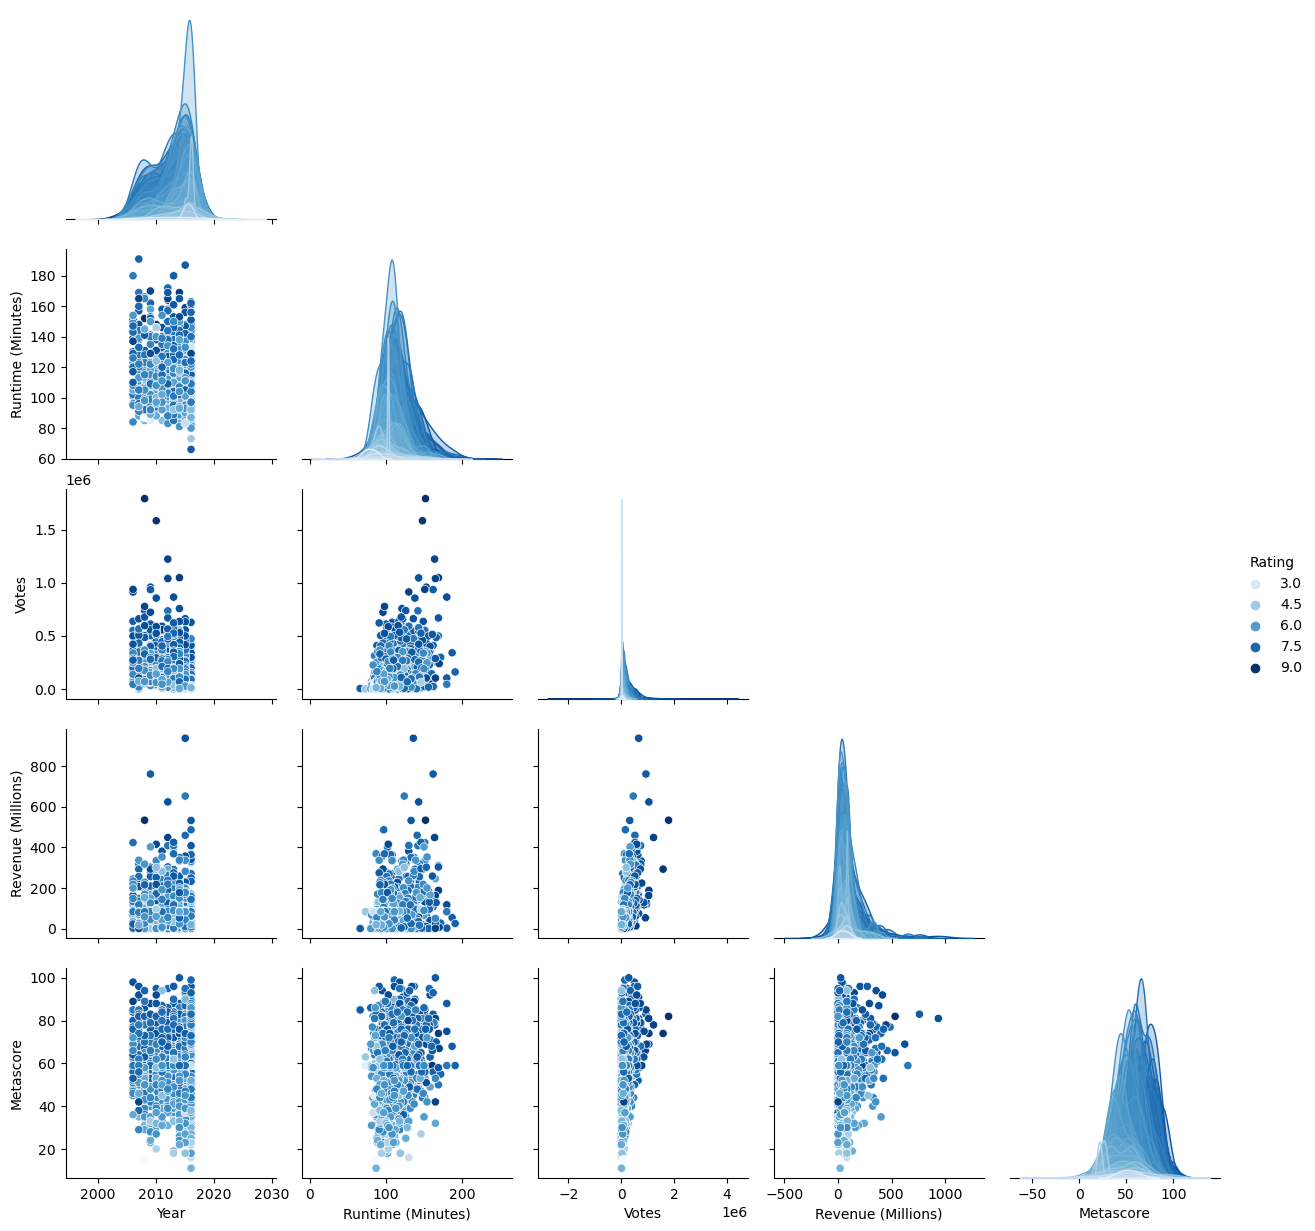

In [176]:
sns.pairplot(data,
             corner=True,
             hue = 'Rating',
             palette= 'Blues')

plt.show()

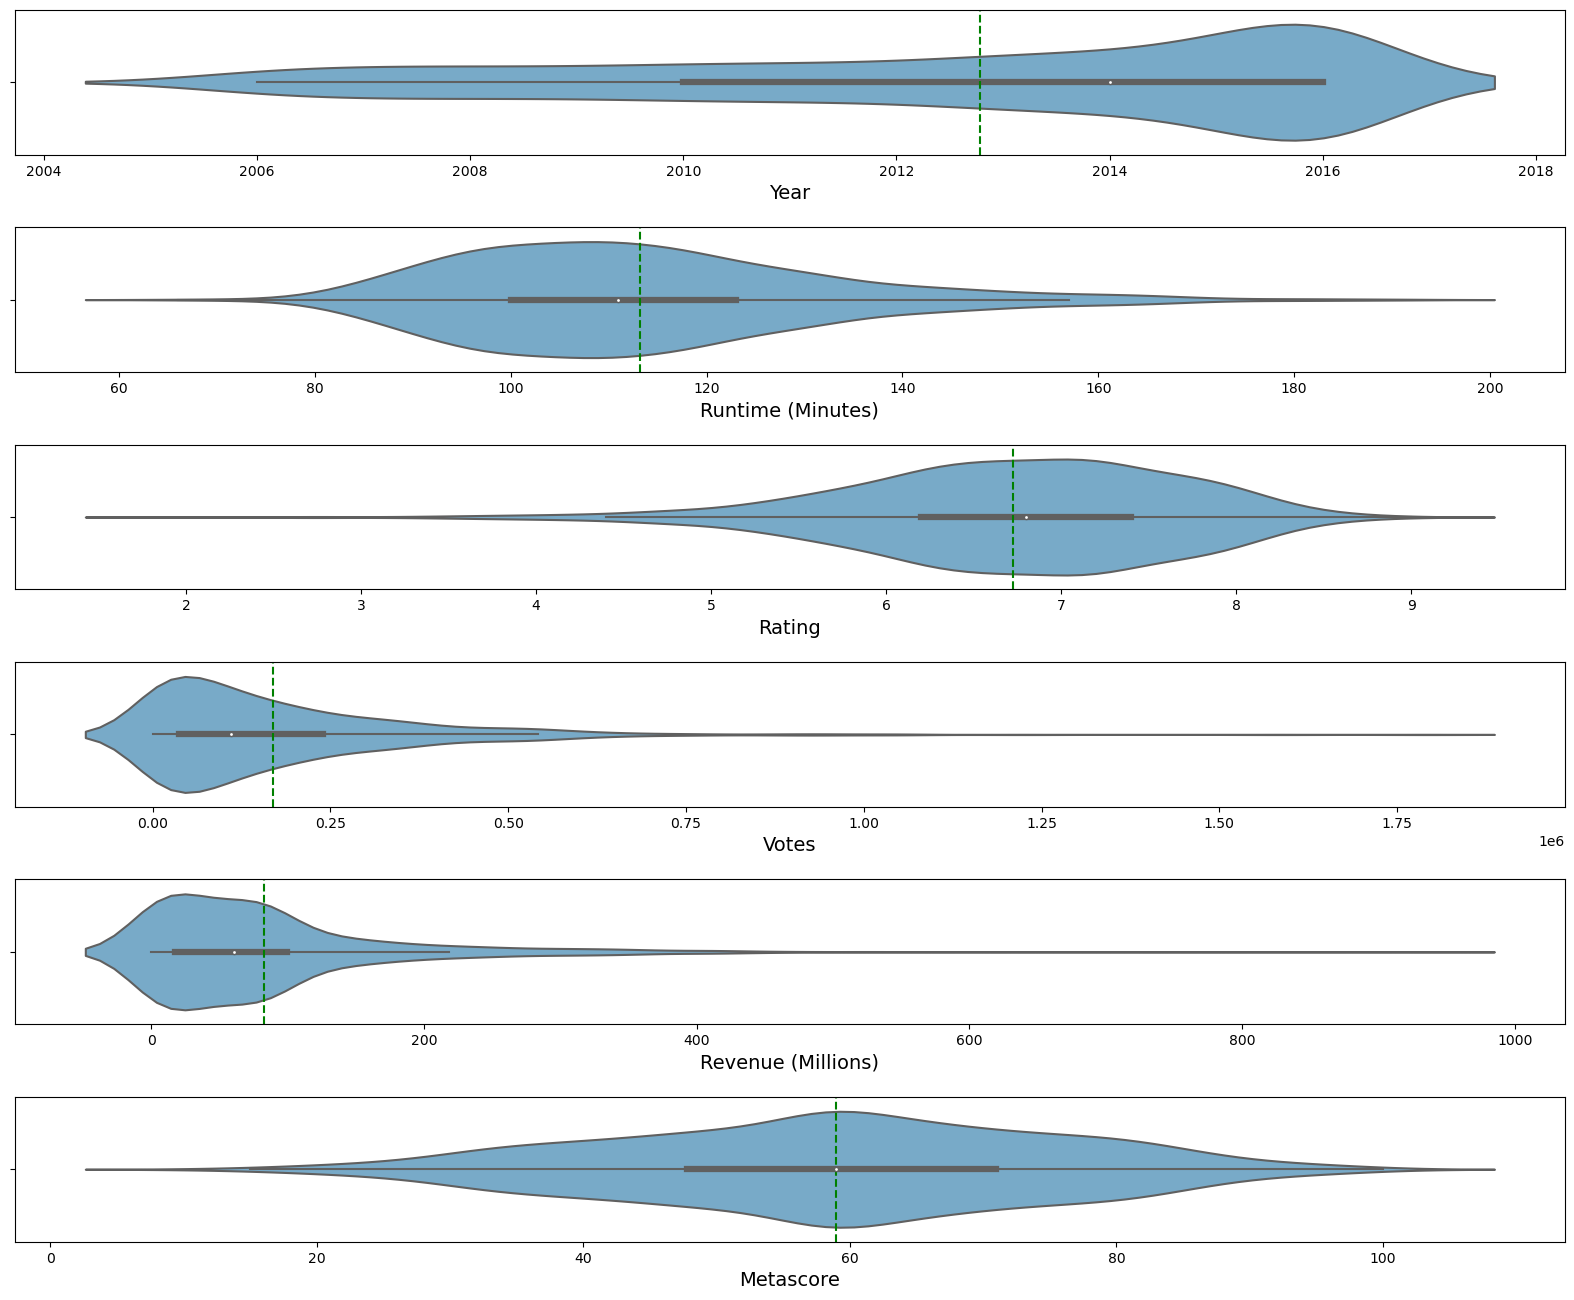

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=len(num_col), ncols=1, figsize=(20, 16))
plt.subplots_adjust(hspace=0.5)

for idx, column in enumerate(num_col):
    ax = axes[idx]
    sns.violinplot(data=data, x=column, palette='Blues', ax=ax)
    ax.axvline(x=data[column].mean(), color='green', linestyle='--')  # Add vertical line for mean
    ax.set_xlabel(column, fontdict={'fontsize': 14})
    ax.set_ylabel('')

plt.show()

Mainstream movies have been made since 2010, with an average length between 100 min and 120 min.

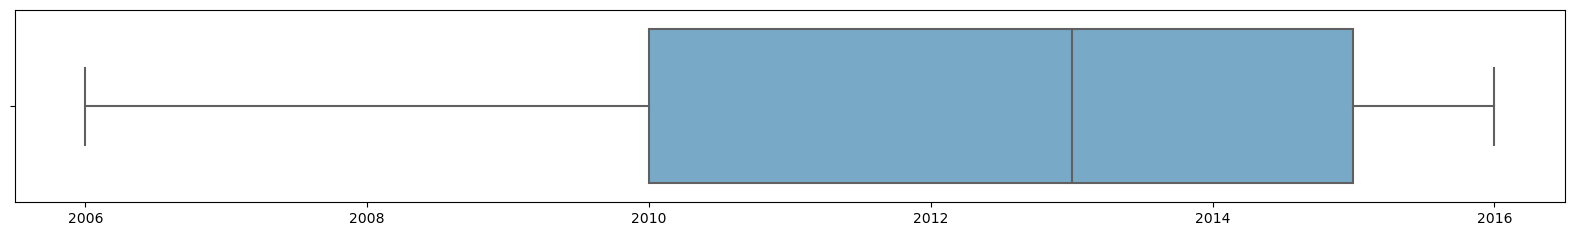

In [103]:
plt.figure(figsize=(20,2.5))
sns.boxplot(x = data[data['Runtime (Minutes)'] > 120]['Year'].values, palette='Blues')
plt.show()

Most of the long-term films are from 2010-2015.

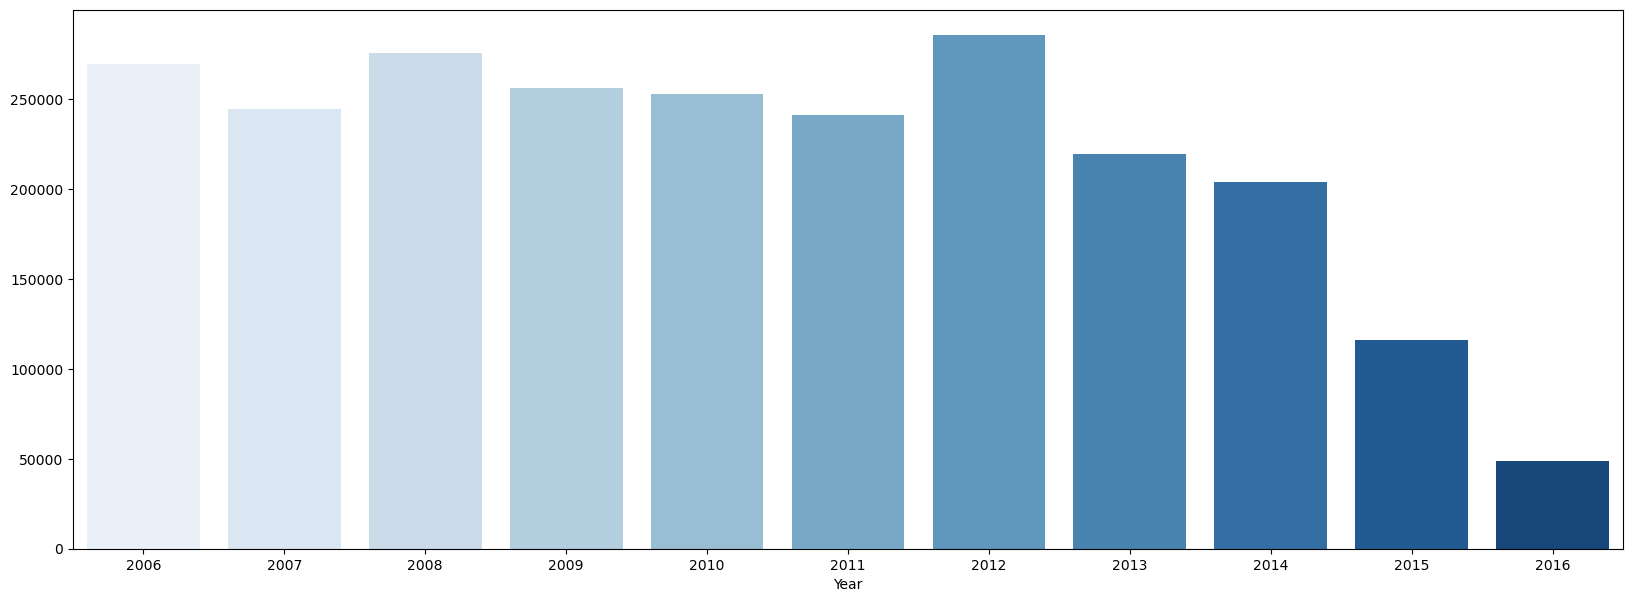

In [109]:
mean_vote_by_year = data.groupby('Year')['Votes'].mean()

plt.figure(figsize=(20,7))
sns.barplot(x=mean_vote_by_year.index, y = mean_vote_by_year.values, palette='Blues')
plt.show()

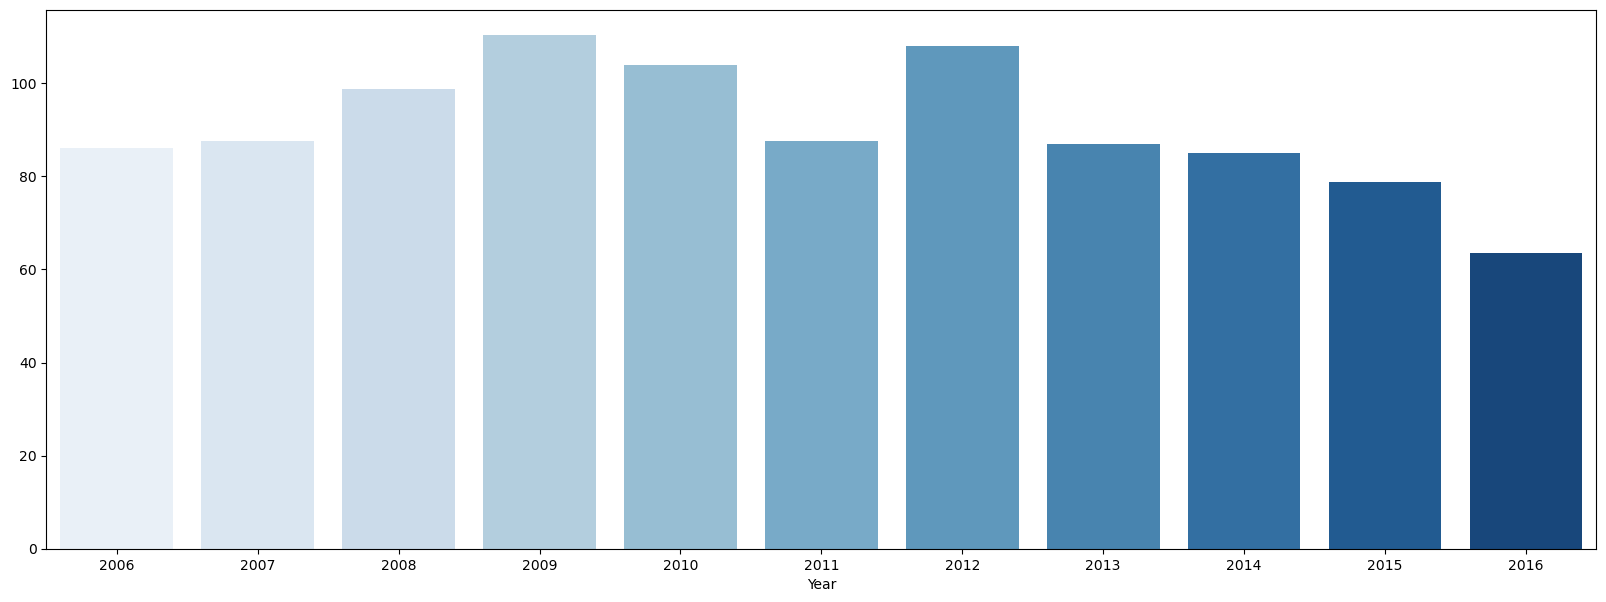

In [110]:
mean_revenue_by_year = data.groupby('Year')['Revenue (Millions)'].mean()

plt.figure(figsize=(20,7))
sns.barplot(x=mean_revenue_by_year.index, y = mean_revenue_by_year.values, palette='Blues')
plt.show()

C:\Users\qiziq\AppData\Local\Temp\ipykernel_9100\2690393134.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_and_last = mean_rating_by_director.head().append(mean_rating_by_director.tail())


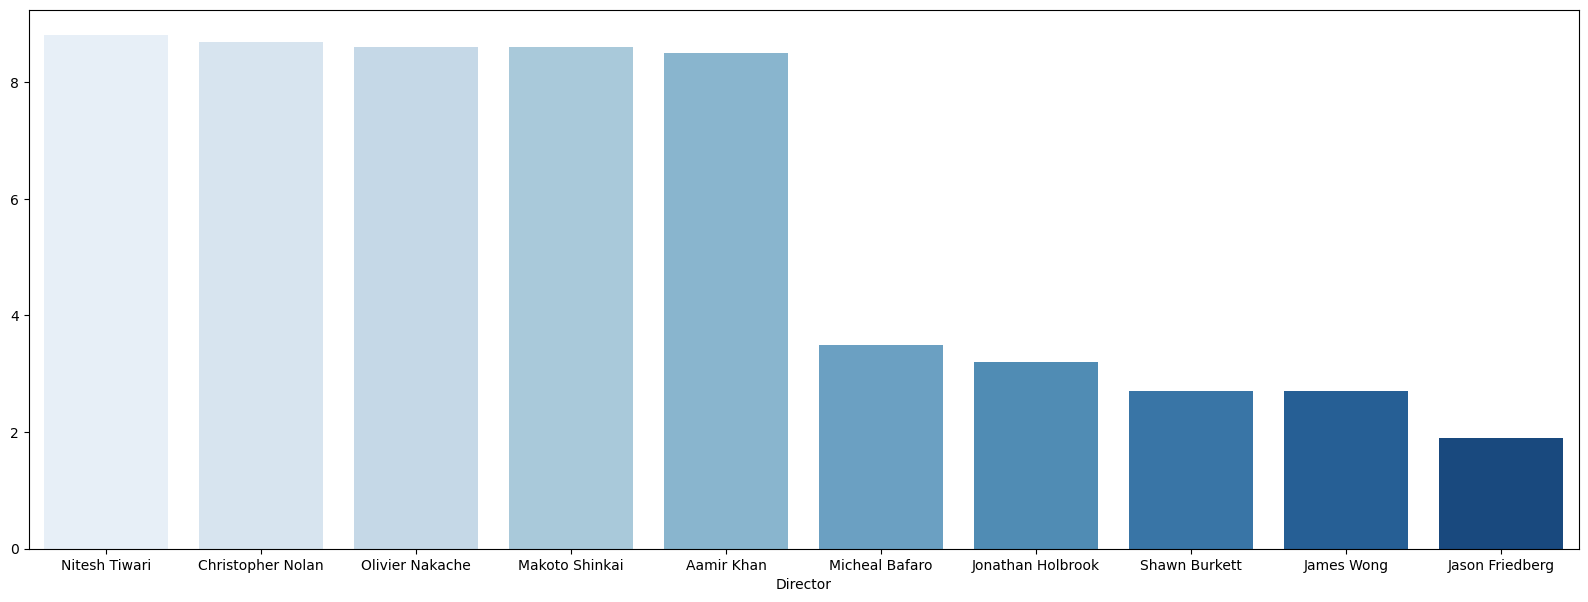

In [125]:
mean_rating_by_director = data.groupby('Director')['Rating'].mean().sort_values(ascending=False)
top_and_last = mean_rating_by_director.head().append(mean_rating_by_director.tail())

plt.figure(figsize=(20,7))
sns.barplot(x=top_and_last.index, y = top_and_last.values, palette='Blues')
plt.show()

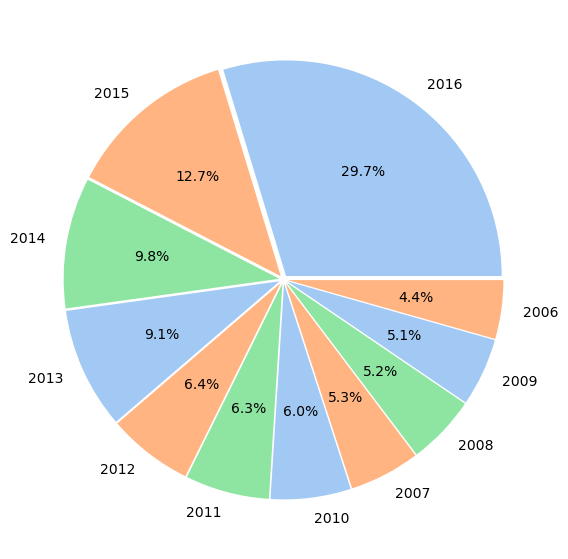

In [143]:
count_number_by_year = data['Year'].value_counts()

plt.figure(figsize=(7,7))
colors = sns.color_palette('pastel')[0:3]
explode = np.full(count_number_by_year.shape[0], fill_value=0.02)
plt.pie(count_number_by_year, labels=count_number_by_year.index, colors=colors,
        explode=explode, autopct='%.1f%%')

plt.show()

In [183]:
df_genre = pd.DataFrame([i.split(',') for i in data['Genre']])
df_genre.head()

,0,1,2
0,Action,Adventure,Sci-Fi
1,Adventure,Mystery,Sci-Fi
2,Horror,Thriller,None
3,Animation,Comedy,Family
4,Action,Adventure,Fantasy


In [220]:
genre_sum = df_genre[0].value_counts() \
    .add(df_genre[1].value_counts(), fill_value = 0) \
    .add(df_genre[2].value_counts(), fill_value = 0)
genre_sum = genre_sum.sort_values(ascending=False)
genre_sum

Drama        513.0
Action       303.0
Comedy       279.0
Adventure    259.0
Thriller     195.0
Crime        150.0
Romance      141.0
Sci-Fi       120.0
Horror       119.0
Mystery      106.0
Fantasy      101.0
Biography     81.0
Family        51.0
Animation     49.0
History       29.0
Sport         18.0
Music         16.0
War           13.0
Western        7.0
Musical        5.0
dtype: float64

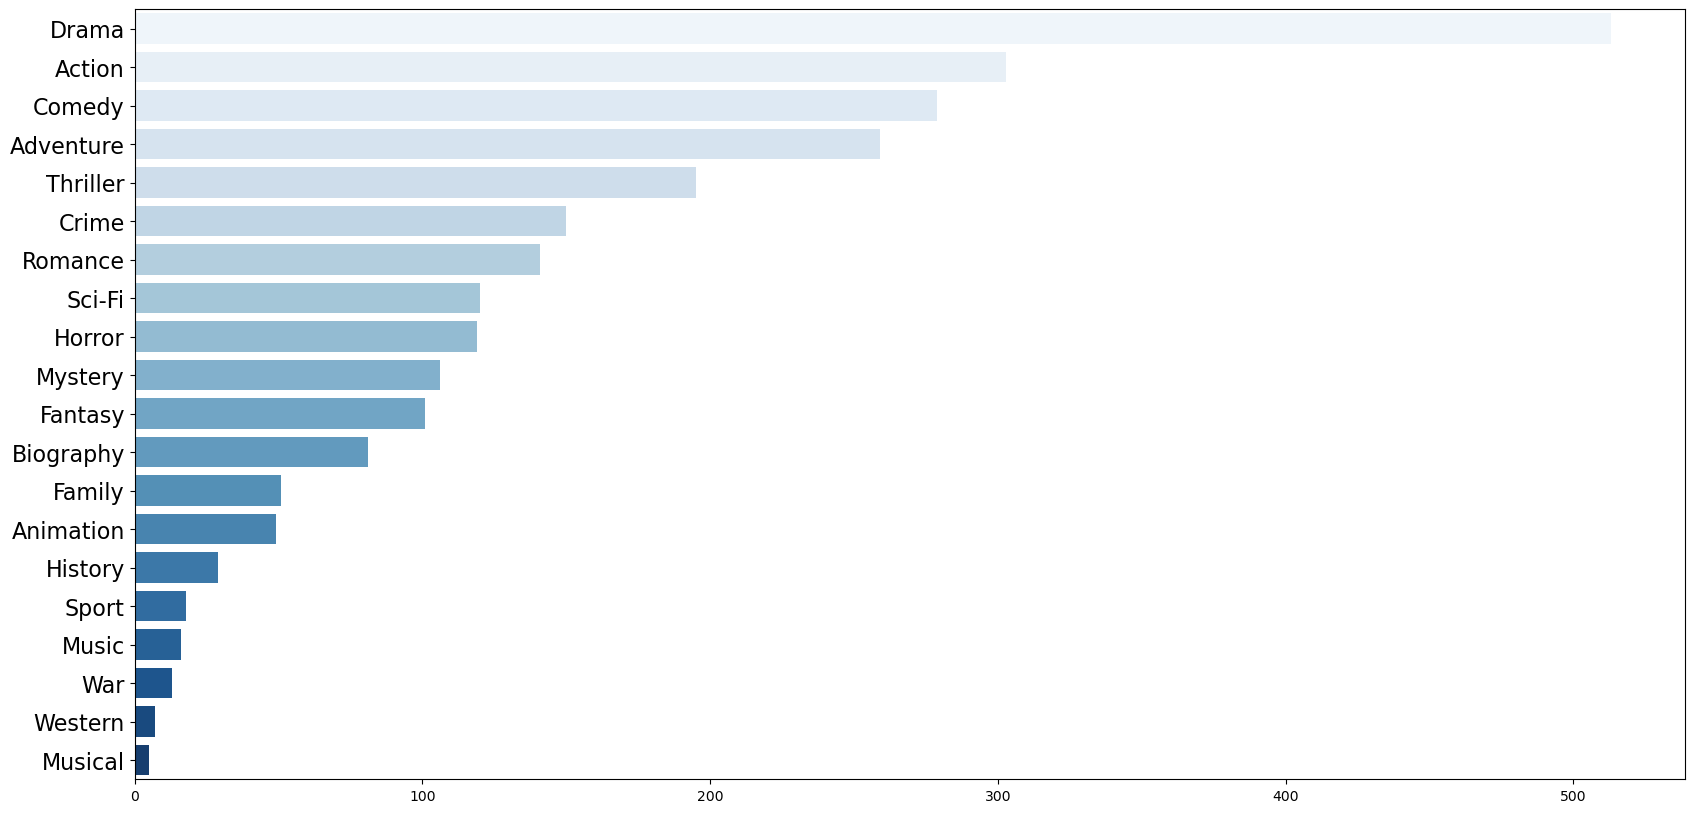

In [230]:
plt.figure(figsize=(20, 10))
sns.barplot(x = genre_sum.values,
            y = genre_sum.index,
            palette= 'Blues')

plt.yticks(fontsize=16)
plt.show()